**Step - 1: Understanding data:**
1. Load Dataset: The following code loads a Titanic dataset, keeps only relevant columns, checks for
missing data, and handles it by either filling with the mean (for columns with over 10% missing) or
dropping rows (for columns with 10% or less missing).

# **Example: Implementing k-NN Algorithm from scratch Step - Step Guide**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("Titanic.csv")
categorical_columns = data.select_dtypes(include=['object']).columns

data = data.drop(columns=[col for col in categorical_columns if col != 'Survived'])

missing_info = data.isnull().sum() /len(data) * 100

for column in data.columns:
    if missing_info[column] > 10:
        data[column].fillna(data[column].mean(), inplace = True)
    else:
        data.dropna(subset=[column], inplace = True)
print("Data after processing:\n", data.head())
print("\nMissing values after processing:\n", data.isnull().sum())

Data after processing:
    PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500

Missing values after processing:
 PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_10092\3479958874.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace = True)


**2. Creating a Feature Matrix and Label Vector and Splitting Train - Test Split:This code separates the
Titanic dataset into features (X) and target (y) and implements a custom train-test splitting function.
It shuffles the data, splits it into training (70%) and testing (30%) sets, and verifies the output by
displaying the shapes of the resulting datasets. This ensures that the model will have separate data for
training and evaluation.**


In [ ]:
x = data.drop(columns=['Survived']).values
y = data['Survived'].values

def train_test_split_scratch(x, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    test_split_size = int(len(x) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    x_train, x_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split_scratch(x, y, test_size = 0.3)

print("Shape of x_train: ", x_train.shape)
print("Shpae of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (624, 6)
Shpae of x_test:  (267, 6)
Shape of y_train:  (624,)
Shape of y_test:  (267,)


**Step - 2: Computing Euclidean Distance Metrices**
1. The function ensures that the inputs are compatible and calculates the Euclidean distance using the formula. It is versatile for n-dimensional spaces and raises errors for incompatible inputs.

In [ ]:
#implementation of Euclidean Distance

def euclidean_distance(point1, point2):
    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions to calculate Euclidean Distance.")
    distance = np.sqrt(np.sum((point1 - point2) ** 2))
    return distance


#test case for euclidean distance computing function

try:
    point1 = np.array([3, 4])
    point2 = np.array([0,0])
    result = euclidean_distance(point1, point2)
    expected_result = 5.0
    assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"
    print("Test passed sucessfully")
except ValueError as ve:
    print(f"valueerror: {ve}")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Test passed sucessfully


**Step - 3: Implementation of core k-NN Algorithm**
1. Predict the class label for a Single Query Point - knn predict single: This function implements the core logic of the K-Nearest Neighbors (KNN) algorithm for a single query point. It calculates the Euclidean distances from the query to all points in the training dataset, identifies the k nearest neighbors, and predicts the class label based on a majority vote among the neighbors. This function is useful for focused predictions on individual data points and acts as a modular building block for the generalized KNN algorithm.

In [ ]:
def knn_predict_single(query, x_train, y_train, k=3):
    # Step 1: Calculate distances from the query to all training points
    distances = [euclidean_distance(query, x) for x in x_train]

    # Step 2: Sort indices of distances in ascending order
    sorted_indices = np.argsort(distances)

    # Step 3: Get the indices of the k nearest neighbors
    nearest_indices = sorted_indices[:k]

    # Step 4: Get the labels of the k nearest neighbors
    nearest_labels = y_train[nearest_indices]

    # Step 5: Predict the label using a majority vote
    prediction = np.bincount(nearest_labels).argmax()

    return prediction


2. Predict Class Labels for All Test Samples - knn predict: This function extends the KNN algorithm to handle multiple test samples simultaneously. By repeatedly calling knn predict single for each query in the test dataset, it predicts class labels for the entire test set. The function provides a streamlined interface to efficiently classify test points in bulk, leveraging the modularity of knn predict single.
3. This test case verifies the functionality of the knn predict
function using a small subset of the test data. It predicts class labels for the subset and compares them
to the actual labels. The test ensures that the predictions have the correct shape and raises an error if
they do not. If successful, it confirms the function’s correctness and prints both the predictions and the
actual labels.

In [ ]:
def knn_predict(x_test, x_train, y_train, k=3):
    # Predict for all test samples using knn_predict_single
    predictions = [knn_predict_single(x, x_train, y_train, k) for x in x_test]
    return np.array(predictions)
try:
    # Use first 5 samples from test data for testing
    x_test_sample = x_test[:5]
    y_test_sample = y_test[:5]

    # Predict using the KNN algorithm
    predictions = knn_predict(x_test_sample, x_train, y_train, k=3)

    # Print results
    print("Predictions: ", predictions)
    print("Actual labels: ", y_test_sample)

    # Verify the predictions match the shape of the test labels
    assert predictions.shape == y_test_sample.shape, "Shape mismatch between predictions and actual labels"
    print("Test case passed")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Predictions:  [0 1 0 0 0]
Actual labels:  [1 0 0 1 1]
Test case passed


**Step - 4: Computing accuracy
The compute accuracy function calculates the accuracy of predictions by comparing the true labels (y true) with the predicted labels (y pred). It computes the percentage of correct predictions out of the total predictions and returns the accuracy as a float value between 0 and 100. The following code evaluates the KNN model’s performance on the entire test set. It predicts the class
labels for all test samples using the knn predict function and calculates the model’s accuracy with the
compute accuracy function. The accuracy is then displayed as a percentage. Any errors during prediction
or computation are caught and reported.
Feature Matrix and Label Vector with Train - Test Split:**

In [ ]:
def compute_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy
try:
    predictions = knn_predict(x_test, x_train, y_train, k = 3)
    accuracy = compute_accuracy(y_test, predictions)
    print(f"Accuracy of the KNN model on the test set: {accuracy: .2f}%")
except Exception as e:
    print(f"an unexpected error occured during prediction or accuracy computation: {e}")


Accuracy of the KNN model on the test set:  61.80%


**Step - 5: Experiment with different values of k:
The function experiment knn k values function evaluates the KNN algorithm’s performance for various
values of k (number of neighbors). It predicts test labels for each k using the knn predict function,
computes the corresponding accuracy with compute accuracy, and stores the results in a dictionary. Finally,
it plots k values against their respective accuracies, providing a visual analysis of how the choice of k affects
the model’s performance. The function also prints the accuracy for each k. The following code sets up an experiment to test the KNN model’s accuracy across a range of k values from
1 to 20 (modifiable range). It calls the experiment knn k values function to run predictions and accuracy
calculations for each k and plots the results to show how accuracy varies with different numbers of neighbors.
If an error occurs during the experiment, it is caught and reported. The output indicates the completion of
the experiment and suggests checking the plot for trends in accuracy.**

Accuracy for k = 1: 58.43%
Accuracy for k = 2: 62.55%
Accuracy for k = 3: 61.80%
Accuracy for k = 4: 63.30%
Accuracy for k = 5: 64.42%
Accuracy for k = 6: 64.42%
Accuracy for k = 7: 65.17%
Accuracy for k = 8: 64.42%
Accuracy for k = 9: 65.17%
Accuracy for k = 10: 64.04%
Accuracy for k = 11: 64.04%
Accuracy for k = 12: 64.79%
Accuracy for k = 13: 64.79%
Accuracy for k = 14: 65.92%
Accuracy for k = 15: 65.17%
Accuracy for k = 16: 65.92%
Accuracy for k = 17: 66.67%
Accuracy for k = 18: 66.29%
Accuracy for k = 19: 67.79%
Accuracy for k = 20: 64.79%


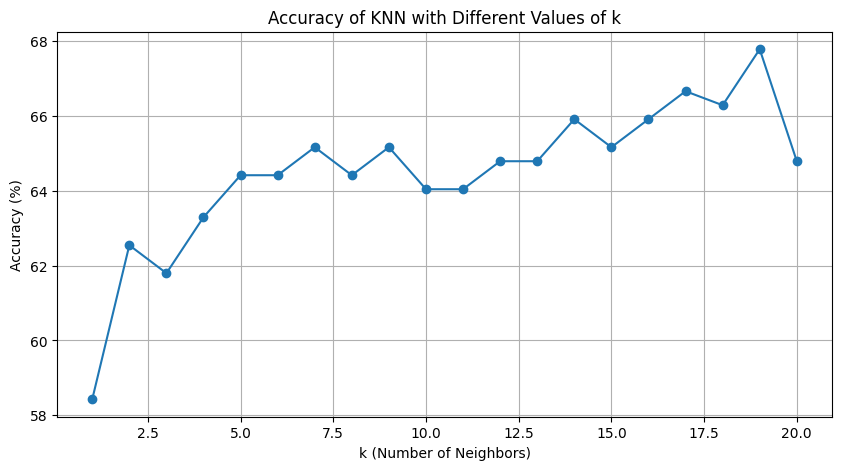

Experiment completed successfully.


In [ ]:
import matplotlib.pyplot as plt

# Experiment function to test different k-values
def experiment_knn_k_values(x_train, y_train, x_test, y_test, k_values):
    accuracies = {}

    for k in k_values:
        try:
            # Get predictions for the given k
            predictions = knn_predict(x_test, x_train, y_train, k=k)

            # Compute accuracy for the current k
            accuracy = compute_accuracy(y_test, predictions)
            accuracies[k] = accuracy

            # Print accuracy for each k
            print(f"Accuracy for k = {k}: {accuracy:.2f}%")
        except Exception as e:
            print(f"Error occurred for k = {k}: {e}")

    # Plot the accuracies
    plt.figure(figsize=(10, 5))
    plt.plot(list(accuracies.keys()), list(accuracies.values()), marker='o')
    plt.xlabel("k (Number of Neighbors)")
    plt.ylabel("Accuracy (%)")
    plt.title("Accuracy of KNN with Different Values of k")
    plt.grid(True)
    plt.show()

    return accuracies

# Range of k-values to test
k_values = range(1, 21)

# Run the experiment
try:
    accuracies = experiment_knn_k_values(x_train, y_train, x_test, y_test, k_values)
    print("Experiment completed successfully.")
except Exception as e:
    print(f"An unexpected error occurred during the experiment: {e}")


# 3. To-DO

**Problem 1: Perform a classification task with knn from scratch.**

In the diabetes dataset, certain columns may contain 0 where it is biologically invalid (e.g., BMI, Glucose, etc.).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
data = pd.read_csv('Diabetes.csv')

print(data.head())

print(data.info())
print(data.isnull().sum())
print(data.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [ ]:
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_impute:
    data[col] = data[col].replace(0, np.nan)
    data[col].fillna(data[col].median(), inplace=True)

print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_9992\420372586.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_9992\420372586.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

> **The dataset is now clean and free of invalid or missing value**

In [ ]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

train_size = int(0.7 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

## Problem - 1: Perform a classification task with KNN from scratch.

### 1. Load the Dataset:
- Read the dataset into a pandas DataFrame.
- Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset:
  - Check data types
  - Check for missing values
  - Summary statistics

### 2. Handle Missing Data:
- Handle any missing values appropriately, either by dropping or imputing them based on the data.

### 3. Feature Engineering:
- Separate the feature matrix (X) and target variable (y).
- Perform a train-test split from scratch using a 70% − 30% ratio.

### 4. Implement KNN:
- Build the KNN algorithm from scratch (no libraries like scikit-learn for KNN).
- Compute distances using Euclidean distance.
- Write functions for:
  - Predicting the class for a single query.
  - Predicting classes for all test samples.
- Evaluate the performance using accuracy.

In [ ]:
# Euclidean distance function
def euclidean_distance(point1, point2):
    """
    Compute the Euclidean distance between two points.

    Args:
    point1 (numpy array or pandas Series): The first data point.
    point2 (numpy array or pandas Series): The second data point.

    Returns:
    float: The Euclidean distance between the two points.
    """
    # Calculate the squared differences for each feature and sum them up
    return np.sqrt(np.sum((point1 - point2) ** 2))

# KNN prediction for a single query
def knn_predict_single(query, X_train, y_train, k=3):
    """
    Predict the class for a single query using KNN.

    Args:
    query (numpy array or pandas Series): The query data point.
    X_train (pandas DataFrame): The training data.
    y_train (pandas Series): The labels for the training data.
    k (int): The number of nearest neighbors to consider. Default is 3.

    Returns:
    int: The predicted class label for the query.
    """
    # Compute the Euclidean distance between the query point and each training point
    distances = [euclidean_distance(query, x) for x in X_train.values]

    # Sort the distances and get the indices of the k nearest neighbors
    sorted_indices = np.argsort(distances)[:k]

    # Get the corresponding labels of the k nearest neighbors
    nearest_labels = y_train.iloc[sorted_indices]

    # Predict the most frequent class label (majority vote)
    prediction = np.bincount(nearest_labels).argmax()

    return prediction

# KNN prediction for all test samples
def knn_predict(X_test, X_train, y_train, k=3):
    """
    Predict the classes for all test samples using KNN.

    Args:
    X_test (pandas DataFrame): The test data.
    X_train (pandas DataFrame): The training data.
    y_train (pandas Series): The labels for the training data.
    k (int): The number of nearest neighbors to consider. Default is 3.

    Returns:
    numpy array: The predicted class labels for all test samples.
    """
    # Predict the class for each test sample using knn_predict_single
    return np.array([knn_predict_single(query, X_train, y_train, k) for query in X_test.values])

try:
    predictions = knn_predict(X_test, X_train, y_train, k=3)  # Run the KNN prediction function
    accuracy = (predictions == y_test.values).mean() * 100  # Calculate accuracy
    print(f"Accuracy: {accuracy:.2f}%")  # Print accuracy if successful
except Exception as e:
    print(f"An error occurred during the prediction or accuracy calculation: {e}")  # Print a user-friendly error message


Accuracy: 74.03%


## Problem - 2: Experimentation

### 1. Repeat the Classification Task:
- Scale the feature matrix **X**.
- Use the scaled data for training and testing the kNN classifier.
- Record the results.

### 2. Comparative Analysis: Compare the Results:
- Compare the accuracy and performance of the kNN model on the **original dataset** from Problem 1 versus the **scaled dataset**.
- **Discuss**:
  - How scaling impacted the KNN performance.
  - The reason for any observed changes in accuracy.

In [ ]:
def scale_data(X):
    """
    Scale the feature matrix X using Z-score normalization (standardization).

    Args:
    X (pandas DataFrame): The feature matrix to be scaled.

    Returns:
    pandas DataFrame: The scaled feature matrix.
    """
    try:
        mean = X.mean(axis=0)
        std = X.std(axis=0)

        # Z-score normalization (standardization)
        X_scaled = (X - mean) / std
        return X_scaled
    except Exception as e:
        print(f"An error occurred during data scaling: {e}")
        return None

# Apply scaling to the feature matrix X
X_scaled = scale_data(X)
if X_scaled is None:
    print("Data scaling failed.")
else:
    # 2. Split the data into training and testing sets (using a 70%-30% split as per the problem)
    train_size = int(0.7 * len(X))  # 70% training data

    """
    Split the data into training and testing sets based on a 70%-30% ratio.

    Args:
    X (pandas DataFrame): The feature matrix.
    y (pandas Series): The target variable.

    Returns:
    X_train_scaled (pandas DataFrame): The scaled training feature matrix.
    X_test_scaled (pandas DataFrame): The scaled testing feature matrix.
    y_train (pandas Series): The training target variable.
    y_test (pandas Series): The testing target variable.
    """
    try:
        # Split the scaled data into training and testing sets
        X_train_scaled, X_test_scaled = X_scaled[:train_size], X_scaled[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]
    except Exception as e:
        print(f"An error occurred during data splitting: {e}")
        X_train_scaled, X_test_scaled, y_train, y_test = None, None, None, None

    if X_train_scaled is None or X_test_scaled is None:
        print("Data splitting failed.")
    else:

        try:
            scaled_predictions = knn_predict(X_test_scaled, X_train_scaled, y_train, k=3)
        except Exception as e:
            print(f"An error occurred during KNN prediction: {e}")
            scaled_predictions = None

        if scaled_predictions is not None:
            """
            Calculate the accuracy of the model by comparing predicted labels to actual labels.

            Args:
            scaled_predictions (numpy array): The predicted labels from the KNN model.
            y_test (pandas Series): The actual labels from the test set.

            Returns:
            float: The accuracy of the model as a percentage.
            """
            try:
                scaled_accuracy = (scaled_predictions == y_test.values).mean() * 100

                print(f"Accuracy on scaled data: {scaled_accuracy:.2f}%")
            except Exception as e:
                print(f"An error occurred during accuracy calculation: {e}")


Accuracy on scaled data: 75.32%


## Problem - 3: Experimentation with k

### 1. Vary the number of neighbors - k:
- Run the KNN model on both the original and scaled datasets for a range of:
  - \( k = 1, 2, 3, \dots, 15 \)
- For each \( k \), record:
  - Accuracy.
  - Time taken to make predictions.

### 2. Visualize the Results:
- Plot the following graphs:
  - k vs. Accuracy for original and scaled datasets.
  - k vs. Time Taken for original and scaled datasets.

### 3. Analyze and Discuss:
- Discuss how the choice of \( k \) affects the accuracy and computational cost.
- Identify the optimal \( k \) based on your analysis.

Original Dataset - k = 1: Accuracy = 69.70%, Time Taken = 1.9142s
Scaled Dataset - k = 1: Accuracy = 71.00%, Time Taken = 1.7386s
Original Dataset - k = 2: Accuracy = 74.03%, Time Taken = 1.7075s
Scaled Dataset - k = 2: Accuracy = 74.46%, Time Taken = 1.7085s
Original Dataset - k = 3: Accuracy = 74.03%, Time Taken = 1.7106s
Scaled Dataset - k = 3: Accuracy = 75.32%, Time Taken = 1.7239s
Original Dataset - k = 4: Accuracy = 73.16%, Time Taken = 1.6971s
Scaled Dataset - k = 4: Accuracy = 73.59%, Time Taken = 1.6912s
Original Dataset - k = 5: Accuracy = 74.46%, Time Taken = 1.6998s
Scaled Dataset - k = 5: Accuracy = 74.03%, Time Taken = 1.6176s
Original Dataset - k = 6: Accuracy = 77.49%, Time Taken = 1.7100s
Scaled Dataset - k = 6: Accuracy = 74.03%, Time Taken = 1.8077s
Original Dataset - k = 7: Accuracy = 77.06%, Time Taken = 1.7125s
Scaled Dataset - k = 7: Accuracy = 77.06%, Time Taken = 1.6866s
Original Dataset - k = 8: Accuracy = 77.49%, Time Taken = 1.7487s
Scaled Dataset - k = 8: 

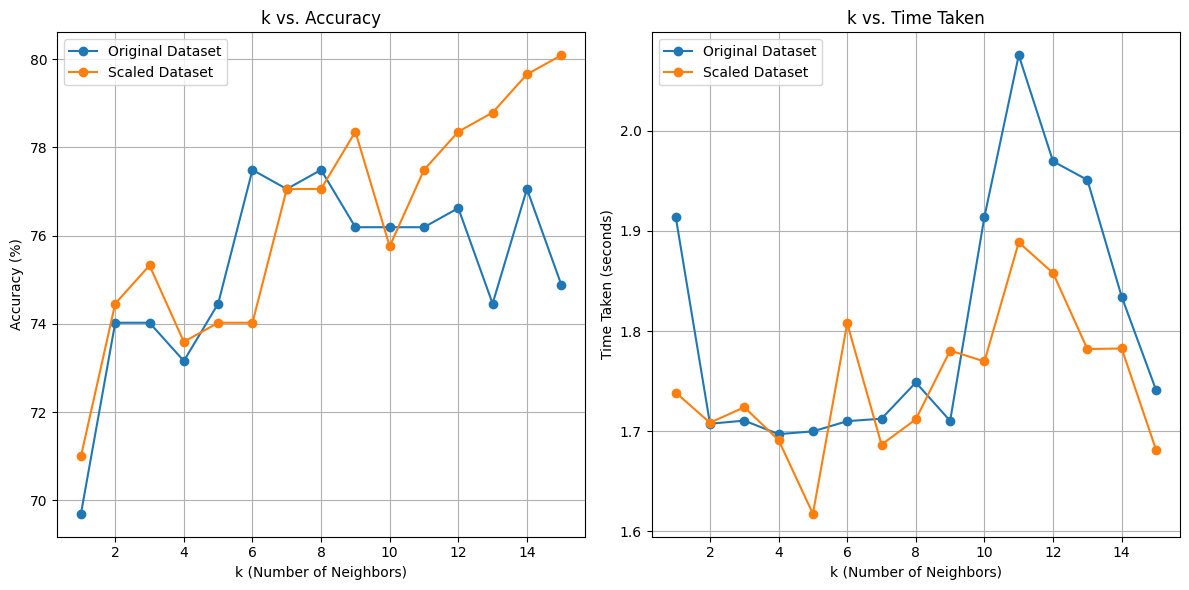

In [ ]:
import time
import matplotlib.pyplot as plt

# Function to compute and print accuracy and time for each k
def evaluate_knn_k_values(x_train, y_train, x_test, y_test, x_train_scaled, x_test_scaled, y_train_scaled, k_values):
    original_accuracies = []
    scaled_accuracies = []
    original_times = []
    scaled_times = []

    # Loop through each k value
    for k in k_values:
        # Original dataset
        start_time = time.time()
        predictions = knn_predict(x_test, x_train, y_train, k=k)
        elapsed_time = time.time() - start_time
        accuracy = (predictions == y_test.values).mean() * 100
        original_accuracies.append(accuracy)
        original_times.append(elapsed_time)
        print(f"Original Dataset - k = {k}: Accuracy = {accuracy:.2f}%, Time Taken = {elapsed_time:.4f}s")

        # Scaled dataset
        start_time = time.time()
        scaled_predictions = knn_predict(x_test_scaled, x_train_scaled, y_train_scaled, k=k)
        elapsed_time = time.time() - start_time
        accuracy = (scaled_predictions == y_test.values).mean() * 100
        scaled_accuracies.append(accuracy)
        scaled_times.append(elapsed_time)
        print(f"Scaled Dataset - k = {k}: Accuracy = {accuracy:.2f}%, Time Taken = {elapsed_time:.4f}s")

    # Plotting results
    plt.figure(figsize=(12, 6))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(k_values, original_accuracies, label='Original Dataset', marker='o')
    plt.plot(k_values, scaled_accuracies, label='Scaled Dataset', marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy (%)')
    plt.title('k vs. Accuracy')
    plt.legend()
    plt.grid(True)

    # Time Plot
    plt.subplot(1, 2, 2)
    plt.plot(k_values, original_times, label='Original Dataset', marker='o')
    plt.plot(k_values, scaled_times, label='Scaled Dataset', marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Time Taken (seconds)')
    plt.title('k vs. Time Taken')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Define the range of k values
k_values = range(1, 16)

# Run the evaluation
evaluate_knn_k_values(X_train, y_train, X_test, y_test, X_train_scaled, X_test_scaled, y_train, k_values)